<a href="https://colab.research.google.com/github/danielsitepu36/ML-Flowers-Multi_Layer_Perceptron/blob/main/Tugas_ML_MLP_Adhit_Daniel_Rian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Multi Layer Perceptron

Alexius Adhitya K            - 18/424179/PA/18284\
Daniel Suranta Sitepu       - 18/424185/PA/18290\
Fransiskus Rian Wardana P   - 18/427592/PA/18552

Spesifikasi:
Multi Layer Perceptron => 1 hidden layer

Ukuran gambar: 320p x 240p, jika tidak sesuai, resize ke 320x240\
Jumlah neuron pada input layer: 320x240 = 76800\
Jumlah neuron pada hidden layer: 80\
Jumlah neuron pada output layer: 3 (one hot encoding)\
Jumlah class: 3 => [rose, sunflower, dandelion]\
Jumlah data per class: 100 gambar, 80 train data, 20 test data

### Import Libraries

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from PIL import Image
from random import shuffle
import numpy as np
from google.colab import drive
import zipfile

### Fungsi Definisi Arsitektur

In [2]:
def defineStructure(X, Y):
    input = X.shape[0]  # size of input layer
    hidden = 80         # hidden layer of size 4
    output = Y.shape[0] # size of output layer
    return (input, hidden, output)

# (input, hidden, output) = define_structure(X_TRAIN, Y_TRAIN)
# print("The size of the input layer is:  = " + str(input_unit))
# print("The size of the hidden layer is:  = " + str(hidden_unit))
# print("The size of the output layer is:  = " + str(output_unit))

### Fungsi Load Dataset - Visualisasi Data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
FILE_PATH = '/content/drive/MyDrive/File Tugas PP dan ML/flowers.zip'

EXTRACTED_PATH = '/tmp/flowers/'
RESIZED_PATH = '/tmp/resized/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extracting zip file to '/tmp/flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# Resizing images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData():
    for folder in USED_CLASSES:
        img_files = os.listdir(EXTRACTED_PATH + folder)
        number = 0
        for item in img_files:
            if item.endswith(".jpg") and number < 100:
                os.makedirs(os.path.dirname(RESIZED_PATH + folder + '/'), exist_ok=True)
                img = Image.open(EXTRACTED_PATH + folder + '/' + item)
                new_img = img.resize((320, 240))
                new_img.save(RESIZED_PATH + folder + '/' + item)
                if folder == 'rose':
                    ROSE_DATA.append((item, folder))
                if folder == 'sunflower':
                    SUNFLOWER_DATA.append((item, folder))
                if folder == 'dandelion':
                    DANDELION_DATA.append((item, folder))
                number+=1

loadData()

In [5]:
shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

print(len(ROSE_DATA))
print(ROSE_DATA[0][0])
# 12313123123.jpg
print(ROSE_DATA[0][1])
# rose

100
8437935944_aab997560a_n.jpg
rose


['dandelion', 'rose', 'sunflower']
5
['dandelion', 'rose', 'sunflower']
5
['dandelion', 'rose', 'sunflower']
5


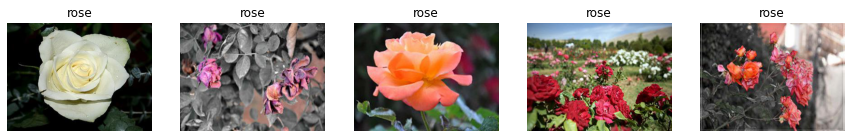

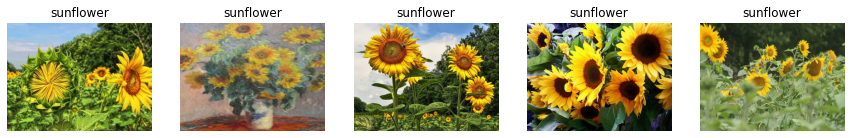

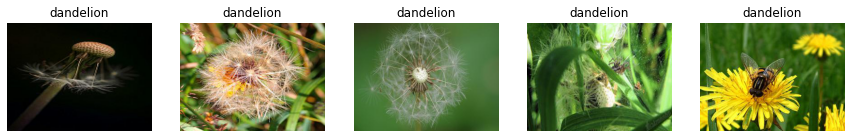

In [6]:
def display_images(images, final=False, cols=5):
  #Display given images and their labels in a grid
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []
  if final:
      folder = FINAL_PATH
  else:
      folder = RESIZED_PATH
  subdirs = os.listdir(folder)
  print(subdirs)
  for subdir in subdirs:
      # examples of RESIZED_PATH:
      # /tmp/resized/{dandelion,rose,sunflower}/gambar
      # /tmp/final/{test_data,train_data}/gambar
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))
#   images = [(Image.open(folder + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
  print(len(result))
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    if final:
        plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    else:
        plt.imshow(image)
    
display_images(ROSE_DATA[:5], False)
display_images(SUNFLOWER_DATA[:5], False)
display_images(DANDELION_DATA[:5], False)

['dandelion', 'rose', 'sunflower']
5
['dandelion', 'rose', 'sunflower']
5


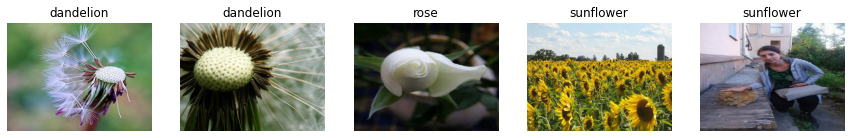

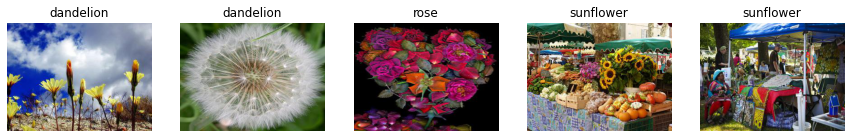

In [7]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
display_images(TRAIN_DATA[:5], False)
display_images(TEST_DATA[:5], False)

### Fungsi Grayscale

In [8]:
def convert2Grayscale(images, folder_name):
    os.makedirs(os.path.dirname(FINAL_PATH + folder_name + '/'), exist_ok=True)
    images2convert = [(Image.open(RESIZED_PATH + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
    for i, (image, image_class) in enumerate(images2convert):
        new_image = image.convert('L')
        new_image.save(FINAL_PATH + folder_name + '/' + images[i][0])

convert2Grayscale(TRAIN_DATA, "train_data")
convert2Grayscale(TEST_DATA, "test_data")

['test_data', 'train_data']
5
['test_data', 'train_data']
5


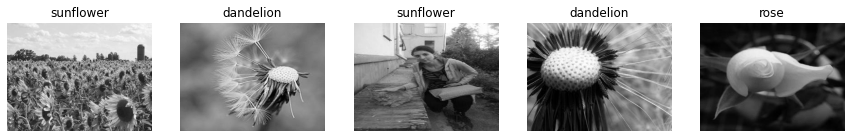

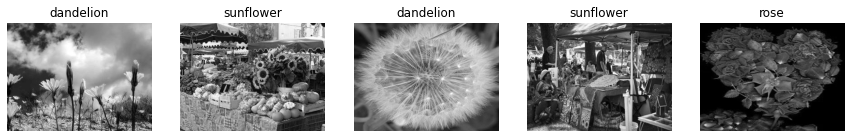

In [9]:
display_images(TRAIN_DATA[:5], True)
display_images(TEST_DATA[:5], True)

### Image to numpy array

In [10]:
def convert2npArray(images, folder_name):
    """
    params:
    -------
    images: list([nama_file, flower_class])
    folder_name: str(roses | dandelion | sunflower | train_data | test_data)
    
    returns:
    --------
    tuple(np.ndarray(X), list(classes))
    """
    array = []
    flowers = []
    for img, flower in images:
        data = np.asarray(Image.open(FINAL_PATH + folder_name + img))
        # print(type(data))
        # print(data.shape)
        array.append(data.flatten())
        if flower == "rose":
          flowers.append(np.array([0,0], dtype=np.float32))
        if flower == "dandelion":
          flowers.append(np.array([0,1], dtype=np.float32))
        if flower == "sunflower":
          flowers.append(np.array([1,0], dtype=np.float32))
        # if flower == "rose":
        #   flowers.append(np.array([0,0,1], dtype=np.float32))
        # if flower == "dandelion":
        #   flowers.append(np.array([0,1,0], dtype=np.float32))
        # if flower == "sunflower":
        #   flowers.append(np.array([1,0,0], dtype=np.float32))
    return np.array(array, dtype=np.float32), np.array(flowers, dtype=np.float32)



TRAIN_X, TRAIN_Y = convert2npArray(TRAIN_DATA, "train_data/")
TEST_X, TEST_Y = convert2npArray(TEST_DATA, "test_data/")
X_train = TRAIN_X.T
Y_train = TRAIN_Y.reshape(2, TRAIN_Y.shape[0])
X_test = TEST_X.T
Y_test = TEST_Y.reshape(2, TEST_Y.shape[0])
print(TRAIN_X.shape)
# print(X_train)
# print(y_train)

print ('Train X Shape:', X_train.shape)
print ('Train Y Shape:', Y_train.shape)
print ('I have m = {} training examples!'.format(X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

(240, 76800)
Train X Shape: (76800, 240)
Train Y Shape: (2, 240)
I have m = 240 training examples!

Test X Shape:  (76800, 60)
